In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file ="output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
# OpenWeatherMap API Key
api_key = "67bbd44f9c04b46485066b28301bcff9"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=hofn
Processing Record 2 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=rikitea
Processing Record 3 of Set 1 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kamenskoye
City not found. Skipping...
Processing Record 4 of Set 1 | surt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=surt
Processing Record 5 of Set 1 | tsienyane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=tsienyane
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcf

Processing Record 2 of Set 2 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=ahipara
Processing Record 3 of Set 2 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=port%20hedland
Processing Record 4 of Set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=ushuaia
Processing Record 5 of Set 2 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=taolanaro
City not found. Skipping...
Processing Record 6 of Set 2 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=cabo%20san%20lucas
Processing Record 7 of Set 2 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=lavrentiya
Processing Record 8 of Set 2 | m

Processing Record 5 of Set 3 | morales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=morales
Processing Record 6 of Set 3 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=tiksi
Processing Record 7 of Set 3 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=salalah
Processing Record 8 of Set 3 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=vaini
Processing Record 9 of Set 3 | pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=pangkalanbuun
Processing Record 10 of Set 3 | matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=matara
Processing Record 11 of Set 3 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 8 of Set 4 | ridgecrest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=ridgecrest
Processing Record 9 of Set 4 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=puerto%20ayora
Processing Record 10 of Set 4 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=aykhal
Processing Record 11 of Set 4 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=cidreira
Processing Record 12 of Set 4 | tayoltita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=tayoltita
Processing Record 13 of Set 4 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=labuhan
Processing Record 14 of Set 4 | laibin
http://api.openweathermap.org/data/

Processing Record 10 of Set 5 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=poum
Processing Record 11 of Set 5 | dolores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=dolores
Processing Record 12 of Set 5 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=new%20norfolk
Processing Record 13 of Set 5 | mikhaylovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=mikhaylovka
Processing Record 14 of Set 5 | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=seoul
Processing Record 15 of Set 5 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=khatanga
Processing Record 16 of Set 5 | kupino
http://api.openweathermap.org/data/2.5/weathe

Processing Record 12 of Set 6 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kloulklubed
Processing Record 13 of Set 6 | zirandaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=zirandaro
Processing Record 14 of Set 6 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=laguna
Processing Record 15 of Set 6 | kainouryion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kainouryion
Processing Record 16 of Set 6 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=alofi
Processing Record 17 of Set 6 | kiunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kiunga
Processing Record 18 of Set 6 | guerrero negro
http://api.openweathermap.org/data/

Processing Record 16 of Set 7 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=buraydah
Processing Record 17 of Set 7 | kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kamaishi
Processing Record 18 of Set 7 | berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=berdigestyakh
Processing Record 19 of Set 7 | kaduqli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kaduqli
Processing Record 20 of Set 7 | mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=mahon
Processing Record 21 of Set 7 | gubkinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=gubkinskiy
Processing Record 22 of Set 7 | mackenzie
http://api.openweathermap.org/data

Processing Record 19 of Set 8 | corsicana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=corsicana
Processing Record 20 of Set 8 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=leningradskiy
Processing Record 21 of Set 8 | waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=waingapu
Processing Record 22 of Set 8 | cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=cururupu
Processing Record 23 of Set 8 | hernani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=hernani
Processing Record 24 of Set 8 | asifabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=asifabad
Processing Record 25 of Set 8 | heishan
http://api.openweathermap.org/da

Processing Record 23 of Set 9 | burica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=burica
City not found. Skipping...
Processing Record 24 of Set 9 | padre bernardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=padre%20bernardo
City not found. Skipping...
Processing Record 25 of Set 9 | wulanhaote
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=wulanhaote
City not found. Skipping...
Processing Record 26 of Set 9 | mindelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=mindelo
Processing Record 27 of Set 9 | kitgum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kitgum
Processing Record 28 of Set 9 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bc

Processing Record 25 of Set 10 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=samarai
Processing Record 26 of Set 10 | braganca paulista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=braganca%20paulista
Processing Record 27 of Set 10 | tarudant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=tarudant
City not found. Skipping...
Processing Record 28 of Set 10 | caohai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=caohai
Processing Record 29 of Set 10 | san francisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=san%20francisco
Processing Record 30 of Set 10 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=yar-sale
Processing Record 31 o

Processing Record 27 of Set 11 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=omboue
Processing Record 28 of Set 11 | rafraf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=rafraf
Processing Record 29 of Set 11 | beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=beloha
Processing Record 30 of Set 11 | qingdao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=qingdao
Processing Record 31 of Set 11 | mitu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=mitu
Processing Record 32 of Set 11 | kuching
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kuching
Processing Record 33 of Set 11 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 29 of Set 12 | zhaocheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=zhaocheng
City not found. Skipping...
Processing Record 30 of Set 12 | osmaniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=osmaniye
Processing Record 31 of Set 12 | dali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=dali
Processing Record 32 of Set 12 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=kudahuvadhoo
Processing Record 33 of Set 12 | waitati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=waitati
Processing Record 34 of Set 12 | tigzirt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67bbd44f9c04b46485066b28301bcff9&q=tigzirt
Processing Record 35 of Set 12 | fort saint john
h

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hofn,100,IS,1556231613,98,64.25,-15.21,36.96,4.97
1,rikitea,93,PF,1556231613,80,-23.12,-134.97,78.33,10.63
2,surt,20,LY,1556231614,50,31.21,16.59,72.40,10.96
3,atuona,4,PF,1556231615,73,-9.80,-139.03,83.51,15.61
4,eenhana,29,NA,1556229600,33,-17.48,16.34,77.00,2.24


# Latitude vs Temperature Plot

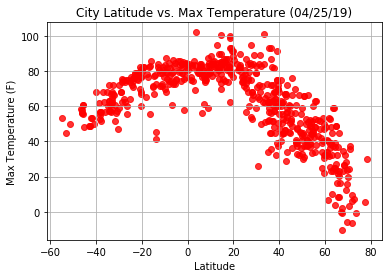

In [13]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            color="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

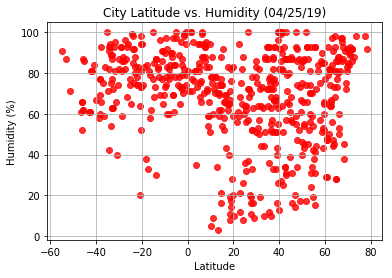

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            color="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

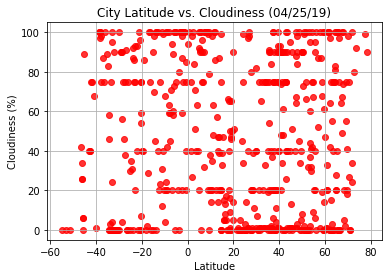

In [15]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            color="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

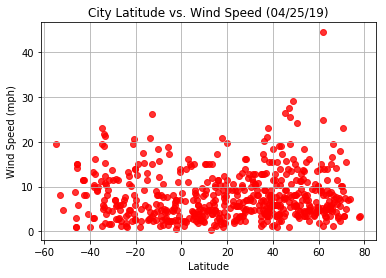

In [16]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            color="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()
